<a href="https://colab.research.google.com/github/JoeMartinRince/-Penguin-Sex-Determination-using-Machine-Learning/blob/main/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

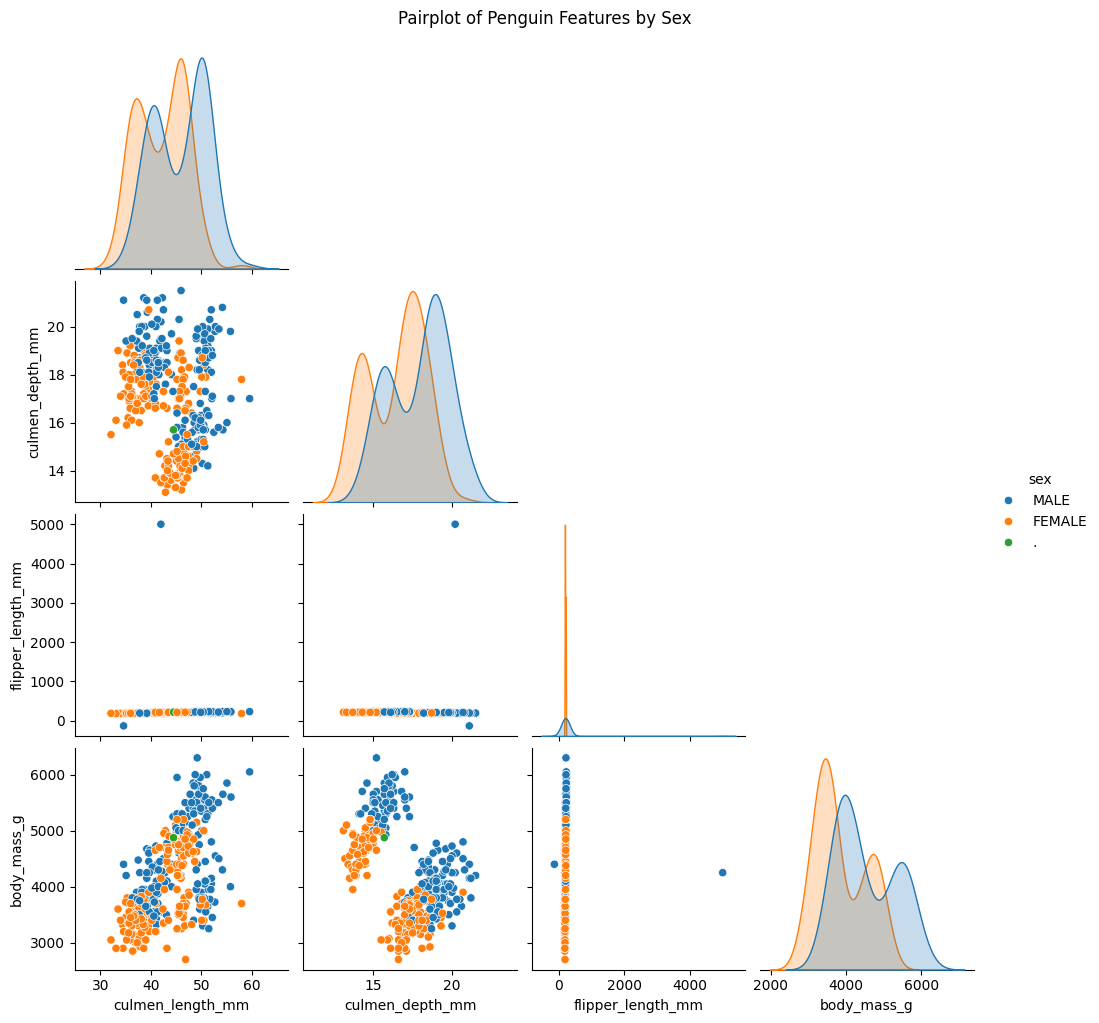

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('penguins.csv')
df.dropna(inplace=True)


sns.pairplot(df, hue='sex', corner=True)
plt.suptitle("Pairplot of Penguin Features by Sex", y=1.02)
plt.show()





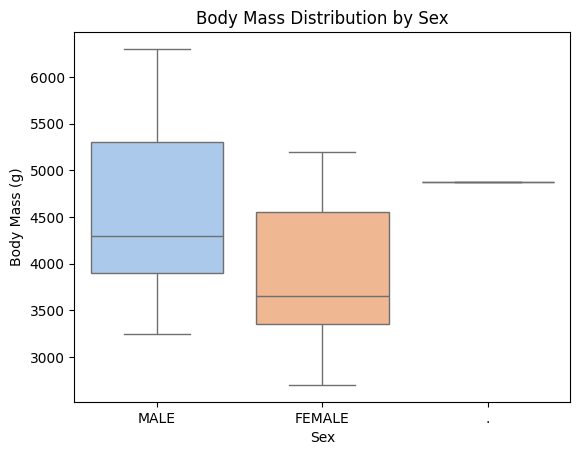

In [ ]:
sns.boxplot(x='sex', y='body_mass_g', data=df, hue='sex', palette='pastel', legend=False)
plt.title("Body Mass Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Body Mass (g)")
plt.show()

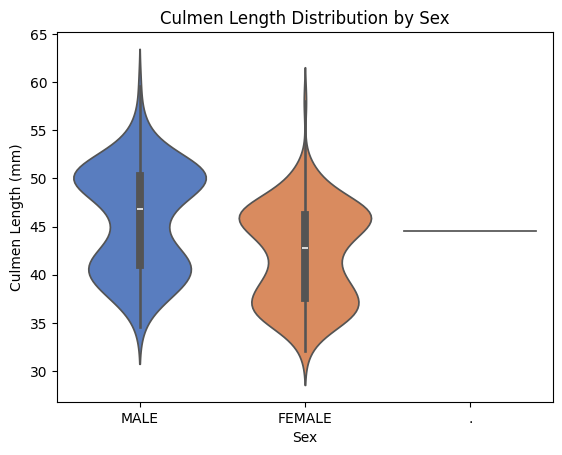

In [ ]:
sns.violinplot(x='sex', y='culmen_length_mm', data=df, hue='sex', palette='muted', legend=False)
plt.title("Culmen Length Distribution by Sex")
plt.xlabel("Sex")
plt.ylabel("Culmen Length (mm)")
plt.show()

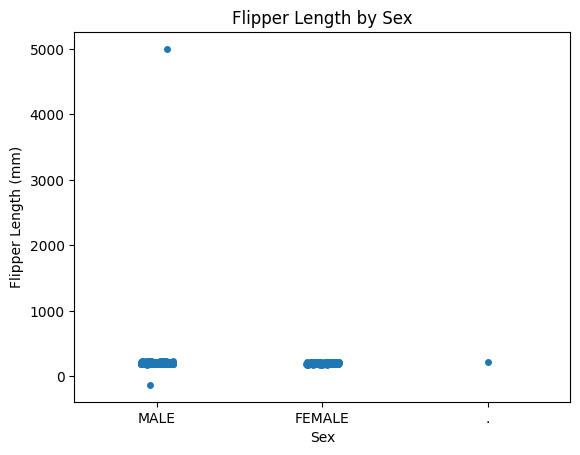

In [ ]:
sns.stripplot(x='sex', y='flipper_length_mm', data=df)
plt.title("Flipper Length by Sex")
plt.xlabel("Sex")
plt.ylabel("Flipper Length (mm)")
plt.show()

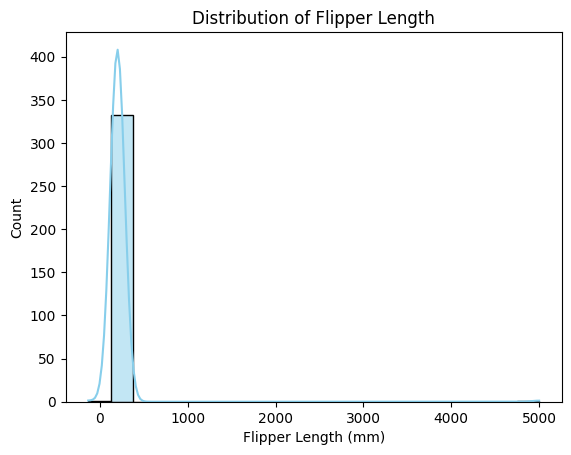

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['flipper_length_mm'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Flipper Length")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Count")
plt.show()

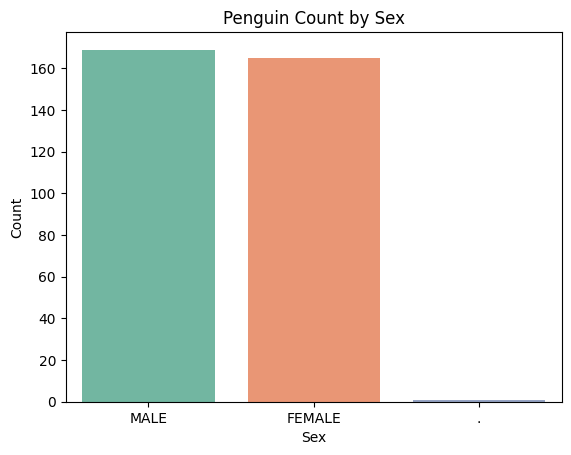

In [ ]:
sns.countplot(x='sex', data=df, hue='sex', palette='Set2', legend=False)
plt.title("Penguin Count by Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

In [ ]:
print(df['sex'].unique())

['MALE' 'FEMALE' '.']



📌 Random Forest Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.88      0.85      0.87        34
           1       0.85      0.88      0.87        33

    accuracy                           0.87        67
   macro avg       0.87      0.87      0.87        67
weighted avg       0.87      0.87      0.87        67


📌 Logistic Regression Accuracy: 0.85
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        34
           1       0.85      0.85      0.85        33

    accuracy                           0.85        67
   macro avg       0.85      0.85      0.85        67
weighted avg       0.85      0.85      0.85        67


📌 Support Vector Machine Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.86      0.91      0.89        34
           1       0.90      0.85      0.88        33

    accuracy                           0.88        67
   macro avg     

/tmp/ipython-input-38-2846153327.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='coolwarm')


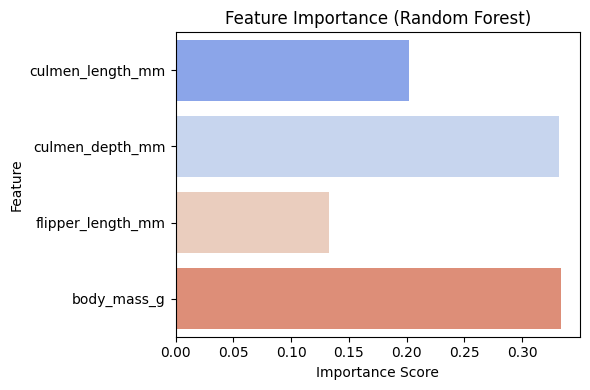

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("penguins.csv")

df['sex'] = df['sex'].replace('.', pd.NA)
df = df.dropna(subset=['sex']).copy()

features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
df = df.dropna(subset=features).copy()


df['sex_encoded'] = df['sex'].map({'MALE': 0, 'FEMALE': 1})

X = df[features]
y = df['sex_encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"\n📌 {name} Accuracy: {acc:.2f}")
    print(classification_report(y_test, y_pred))

rf_model = models["Random Forest"]
importances = rf_model.feature_importances_

plt.figure(figsize=(6, 4))
sns.barplot(x=importances, y=features, palette='coolwarm')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()